In [1]:
#import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('C:/Users/Cris/Downloads/MLAPLI-master/bankloan.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount'] * 1000).astype(int)
Counter(df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [3]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1, N=0))

In [4]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(X_train,y_train, batch_size=20, epochs=50, verbose=0)
eval_model=classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.8889


[0.36280545592308044, 0.8888888955116272]

In [7]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.61)

5/5 [==============================] - 0s 4ms/step


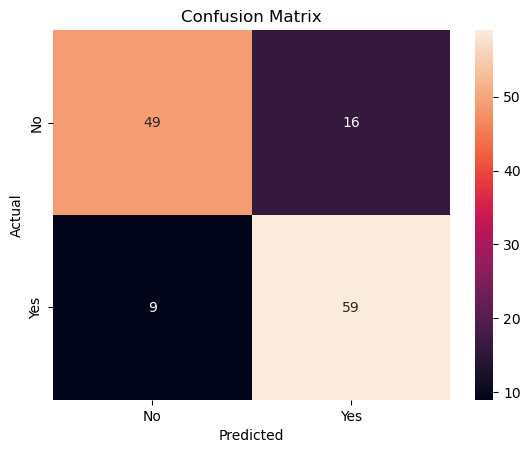

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot= True, ax = ax);

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);


In [9]:
import pickle
import joblib
filename = 'loan_model.h5'
classifier.save(filename)

In [10]:
from tensorflow import keras  # Import 'keras' from 'tensorflow'
from keras import Sequential
from keras.layers import Dense
sc = MinMaxScaler()
mdl = keras.models.load_model('C:/Users/Cris/loan_model.h5')
X= pd.read_excel('C:/Users/Cris/test.xlsx')
X_test = sc.fit_transform(X)
y_pred = mdl.predict(X_test)
y_pred = (y_pred>0.61)

1/1 [==============================] - 0s 173ms/step


In [11]:
val=pd.DataFrame(y_pred, columns=['Status'])
val=val.replace({True: 'Approved', False: 'Rejected'})
val

,Status
0,Approved
1,Rejected
2,Rejected
3,Rejected
4,Approved
5,Rejected
6,Rejected
7,Rejected
8,Approved
9,Approved


In [12]:
data={
    "Dependents": 1,
    "ApplicantIncome": 458300,
    "CoapplicantIncome": 15080,
    "LoanAmount": 128000,
    "Loan_Amount_Term": 360,
    "Credit_History": 0,
    "Gender_Female": 0,
    "Gender_Male": 1,
    "Married_No": 0,
    "Married_Yes": 1,
    "Education_Graduate": 1,
    "Education_Not_Graduate": 0,
    "Self_Employed_No": 0,
    "Self_Employed_Yes": 1,
    "Property_Area_Rural": 1,
    "Property_Area_Semiurban": 0,
    "Property_Area_Urban": 0
    
}

In [13]:
unit=np.array(list(data.values()))
unit=unit.reshape(1,-1)
unit

array([[     1, 458300,  15080, 128000,    360,      0,      0,      1,
             0,      1,      1,      0,      0,      1,      1,      0,
             0]])

In [14]:

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Convert data to a 2D array and then scale it
input_data = [list(data.values())]
scaled_data = scaler.fit_transform(input_data)

# Inverse transform to get the original values
original_data = scaler.inverse_transform(scaled_data)

# Print the scaled and original data
print("Scaled Data:")
print(scaled_data)

print("Original Data:")
print(original_data)
#This code creates a MinMaxScaler, scales your data, and then inverts the scaling to retrieve the original values. This ensures that your input data is properly scaled for use with your model.


Scaled Data:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Original Data:
[[1.000e+00 4.583e+05 1.508e+04 1.280e+05 3.600e+02 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  1.000e+00 0.000e+00 0.000e+00]]


In [15]:
# Make loan prediction using the Keras model
prediction = mdl.predict(data)
if prediction[0][0] > 0.61:  # Adjust the threshold as needed
    print('Loan Application Approved')
else:
    print('Loan Application Rejected')

ValueError: Failed to find data adapter that can handle input: (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'int'>"} values), <class 'NoneType'>